# Conclusion

## Un point sur les mathématiques

Avant de terminer avec la conclusion ce projet, donner un peu de théorie peut-être une bonne idée.

Lors de la présentation du bruit de Perlin, nous avions parlé de version "fractal"(somme de plusieurs bruits à différentes fréquences et amplitudes). Ce terme "fractal" vient d'un terme plus large : "Mouvement brownien fractionnaire"(mbf en français : fbm en anglais, c'est pour cela que si on lit pas mal de documents anglais sur les bruits on va retrouver comme nom de fonction : fbm(x,y)). Ce terme provient du domaine des probabilités et est une généralisation des mouvements browniens. Et c'est dans ces mouvements qu'apparaissent le pseudo-aléatoire. Ce domaine étant très large( et je doute d'avoir les capacités pour le comprendre correctement et donc pour l'expliquer) nous ne pouvons pas le voir ici. Cependant les fbm ont une définition mathématique et donc peuvent être générés via des méthodes se basant sur la théorie et les formules (donc en général + complexe et + long à générer). Donc c'est quelque chose de purement mathématique ne trouvant que dans de rares cas des applications par les artistes dans le domaine de la génération pseudo-aléatoire. Mais cet objet défini mathématiquement a donc des propriétés mathématiques propres pouvant être utiles pour générer de nouveaux bruits et bien +. 
Liens pour en savoir + : 
- https://en.wikipedia.org/wiki/Multifractal_system
- https://en.wikipedia.org/wiki/Fractional_Brownian_motion
- https://en.wikipedia.org/wiki/Brownian_motion

Un exemple d'intégration : Compréhensible niveau code, beaucoup moins niveau théorique. (Ici surface brownien : **Source** https://gist.github.com/radarsat1/6f8b9b50d1ecd2546d8a765e8a144631 ; **Auteur** : https://gist.github.com/radarsat1).

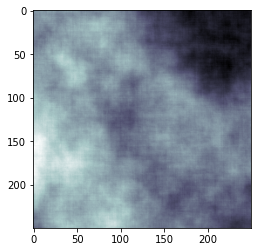

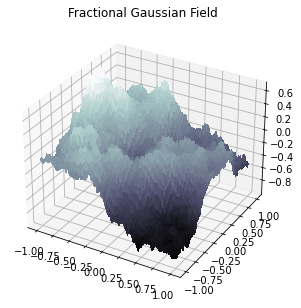

In [4]:
import numpy as np
# embedding of covariance function on a [0,R]^2 grid
def rho(x,y,R,alpha):

    if alpha <= 1.5:
        # alpha=2*H, where H is the Hurst parameter
        beta = 0
        c2 = alpha/2
        c0 = 1-alpha/2
    else:
        # parameters ensure piecewise function twice differentiable
        beta = alpha*(2-alpha)/(3*R*(R**2-1))
        c2 = (alpha-beta*(R-1)**2*(R+2))/2
        c0 = beta*(R-1)**3+1-c2

    # create continuous isotropic function
    r = np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
    if r<=1:
        out=c0-r**alpha+c2*r**2
    elif r<=R:
        out=beta*(R-r)**3/r
    else:
        out=0

    return out, c0, c2

# The main control is the Hurst parameter: H should be between 0 and
# 1, where 0 is very noisy, and 1 is smoother.
def brownian_surface(N=1000, H=0.98):
    R = 2  # [0,R]^2 grid, may have to extract only [0,R/2]^2

    # size of grid is m*n; covariance matrix is m^2*n^2
    M = N

    # create grid for field
    tx = np.linspace(0, R, M)
    ty = np.linspace(0, R, N)
    rows = np.zeros((M,N))


    for i in range(N):
        for j in range(M):
            # rows of blocks of cov matrix
            rows[j,i] = rho([tx[i],ty[j]],
                            [tx[0],ty[0]],
                            R, 2*H)[0]

    BlkCirc_row = np.vstack(
        [np.hstack([rows, rows[:,-1:1:-1]]),
         np.hstack([rows[-1:1:-1,:], rows[-1:1:-1, -1:1:-1]])])

    # compute eigen-values
    lam = np.real(np.fft.fft2(BlkCirc_row))/(4*(M-1)*(N-1))
    lam = np.sqrt(lam)

    # generate field with covariance given by block circular matrix
    Z = np.vectorize(complex)(np.random.randn(2*(M-1), 2*(M-1)),
                              np.random.randn(2*(M-1), 2*(M-1)))
    F = np.fft.fft2(lam*Z)
    F = F[:M, :N] # extract sub-block with desired covariance

    out,c0,c2 = rho([0,0],[0,0],R,2*H)

    field1 = np.real(F) # two independent fields
    field2 = np.imag(F)
    field1 = field1 - field1[0,0] # set field zero at origin
    field2 = field2 - field2[0,0] # set field zero at origin

    # make correction for embedding with a term c2*r^2
    field1 = field1 + np.kron(np.array([ty]).T * np.random.randn(),
                              np.array([tx]) * np.random.randn())*np.sqrt(2*c2)
    field2 = field2 + np.kron(np.array([ty]).T * np.random.randn(),
                              np.array([tx])   * np.random.randn())*np.sqrt(2*c2)
    X,Y = np.meshgrid(tx,ty)

    field1 = field1[:N//2, :M//2]
    field2 = field2[:N//2, :M//2]
    return (field1, field2)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

field = brownian_surface(N=500, H=0.8)

plt.imshow(field[0], cmap="bone")
plt.show()


fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(-1,1,field[0].shape[0]),
                       np.linspace(-1,1,field[0].shape[1]))
ax.plot_surface(X, Y, field[0], cmap="bone",linewidth=0, antialiased=False)
plt.title('Fractional Gaussian Field')
plt.show()


## Conclusion

Ce projet avait pour objectif de donner les **bases** des **bruits pseudo-aléatoires**. Non mathématiquement mais par divers applications. En présentant les principaux **bruits**, leurs **générations**, des **opérations** typiques et **élémentaires** ainsi que des **exemples** concrets avec au final un large éventail d'opérations et d'idées disponibles pour un artiste novice dans la manipulation des bruits. L'idée, comme répétée plusieurs fois depuis le début, est de **combiner diverses bruits et opérations afin de former le résultat souhaité**. Au final le projet avait aussi pour but de mettre en évidence la présence de ces bruits dans le monde audio-visuel. C'est à dire que quand vous regardez des films avec des effets spéciaux, de la génération(SciFi par exemple) ou lorsque vous jouez à des jeux-vidéos vous aurez de grandes chances d'avoir un bruit de Perlin + ou - transformé devant vos yeux. 

La note qui peut-être bon de rajouter est que durant tous ce projet nous avons généré les bruits comme des matrices, c'est à dire que l'algorithme génère une matrice. Mais dans la plupart des cas on génère la valeur du bruit que pour un seul point. C'est à dire que notre algorithme est la fonction n(x,y) par exemple. En effet faire cela permet de plus facilement le manipuler. Exemple lors du domain warping quand on avait besoin de générer une plus grande matrice que celle que l'on veut transformer si on veut pouvoir avoir une transformation dépendant de x et y. À noter aussi que si on souhaite générer un bruit identique lors de la 2 ème itération il faut coder un système de seed(graine). C'est à dire une liste de nombres aléatoires = permutations pouvant être regénérées via un nombre "seed" que l'on donne. Et ceux sont ces permutations qui vont donner les gradients pour le bruit de Perlin par exemple. Faire ce système est très important car un des objectifs secondaires des bruits est que ça n'a pas besoin d'être sauvegardé sur le disque. Par exemple afin de générer un univers entier et que lorsqu'on se déplace les planètes sont identiques. (Donc on regénère à chaque fois la portion de l'espace où le joueur se situe).

**Merci d'avoir porter attention à ce projet.**

## Références

- https://thebookofshaders.com/
- https://adrianb.io/2014/08/09/perlinnoise.html
- https://en.wikipedia.org/wiki/Perlin_noise
- https://en.wikipedia.org/wiki/Simplex_noise
- https://catlikecoding.com/unity/tutorials/pseudorandom-noise/noise-variants/
- https://hal.inria.fr/inria-00402079/document *(pour la simulation d'érosion ratée)*

- https://threejs.org/ *(Moteur 3D pour JavaScript(Rendus des planètes)*

**Aller plus loin:** 

- https://hal.archives-ouvertes.fr/hal-00695670/document *(Gabor noise)*
- https://www.cs.ubc.ca/~rbridson/docs/bridson-siggraph2007-curlnoise.pdf *(Incompressible noise)*
- http://paulbourke.net/fractals/randomwalk/ *(Autre méthode pour générer un bruit)*
- https://en.wikipedia.org/wiki/Fractional_Brownian_motion *(La théorie mathématique)*